In [82]:
import os
import sys
import glob
import datetime
import warnings
from functools import partial

import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%matplotlib inline

color = (0.45, 0.57, 1)
sns.set(style="whitegrid")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('use_inf_as_na', True)

PROJECT_NAME = 'UFAL-DS'
curdir = os.path.abspath(os.path.curdir).split('/')
project_index = curdir.index(PROJECT_NAME)
os.chdir('/' + os.path.join(*curdir[:project_index + 1]))

In [83]:
cols_dict = {
    'Nome':'name', 'CPF':'cpf', 'Matricula':'registration_n', 
    'Orgao':'agency', 'Sigla Orgao':'agency_acronym', 'Orgao vinculacao':'superior_agency_cod',
    'Cargo emprego':'role', 'Classe':'classes', 'Padrao':'pattern', 'Referencia':'ref', 'Nivel':'level',
    'Tipo aposentadoria':'retirement_type', 'Fund legal aposentadoria':'legal_substantiation',
    'Portaria aposentadoria':'doc_title', 'Dt ocorrencia inatividade':'retirement_date',
    'Nome ocorrencia':'admission_type', 'Dt ingresso servico publico':'admission_date',
    'Valor aposentadoria                                                                                                                                                            ':'value'
}

In [124]:
def sanitize(df: DataFrame) -> DataFrame:
    df["name"] = df['name'].str.strip().str.lower()
    df['admission_date'] = df['admission_date'].astype(str)
    df['admission_date'] = df['admission_date'].str.strip()
    
    for col in ["retirement_date", "admission_date"]:
        df[col] = df[col].astype(str).str.strip()
        cond = (df[col].str.len() == 7)
        df.loc[cond, col] = '0' + df.loc[cond, col]
        df = df.loc[df[col].str.len() != 0]
        df[col] = pd.to_datetime(
            df[col], format='%d%m%Y'
        )
    
    df["value"] = df['value'].str.replace('.', '').str.replace(',','.').astype(float)
    
    df = df.drop_duplicates(subset=['name', 'cpf', 'value'], keep='first')

    return df

In [125]:
def read_data(directory:str = "data/raw/aposentados/*.csv") -> DataFrame:
    df = pd.read_csv(
        'data/raw/aposentados/APOSENTADOS_022020_FULL.csv', 
        sep=';', encoding="ISO-8859-1", error_bad_lines=False, header=0
    )
    header = df.columns.to_list()
    
    files = [file for file in glob.glob(directory) if 'FULL' not in file]
    
    df = pd.concat(
        [df] + [
            pd.read_csv(file, encoding="ISO-8859-1", sep=';', names=header) 
            for file in files],
        ignore_index=False
    )
    
    df.rename(columns=cols_dict, inplace=True)    
    
    df = sanitize(df)
    
    return df

In [126]:
dataset = read_data()

b'Skipping line 2358: expected 18 fields, saw 19\nSkipping line 22235: expected 18 fields, saw 19\nSkipping line 29581: expected 18 fields, saw 19\nSkipping line 30624: expected 18 fields, saw 20\n'
b'Skipping line 35299: expected 18 fields, saw 19\nSkipping line 37529: expected 18 fields, saw 19\nSkipping line 45538: expected 18 fields, saw 19\nSkipping line 57026: expected 18 fields, saw 19\nSkipping line 57040: expected 18 fields, saw 19\nSkipping line 57052: expected 18 fields, saw 19\nSkipping line 57076: expected 18 fields, saw 19\nSkipping line 57077: expected 18 fields, saw 19\nSkipping line 57086: expected 18 fields, saw 19\nSkipping line 57111: expected 18 fields, saw 19\nSkipping line 57131: expected 18 fields, saw 19\nSkipping line 57152: expected 18 fields, saw 19\nSkipping line 58325: expected 18 fields, saw 19\nSkipping line 60124: expected 18 fields, saw 19\nSkipping line 60613: expected 18 fields, saw 19\nSkipping line 60702: expected 18 fields, saw 19\nSkipping line 6

In [92]:
dataset.head()

,name,cpf,registration_n,agency,agency_acronym,superior_agency_cod,role,classes,pattern,ref,level,retirement_type,legal_substantiation,doc_title,retirement_date,admission_type,admission_date,value
0,antonio alves bezerra,***686441**,130000000029,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE VIGILANCIA,S,II,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 63194 PUBLICADO EM 30DEZ1994 ...,1994-12-30,NOMEACAO PARA CARGO ...,1962-06-15,2596.79
1,antonio carlos conceicao martins,***423941**,130000000033,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,ESTATISTICO,S,III,0,0,VOLUNTARIA,CF 40 III A,PORTARIA NO. 26 PUBLICADO EM 31JAN1995 ...,1995-01-31,ADMISSAO SEM CONCURSO PUBLICO ...,1962-06-15,10951.35
2,antonio domingos alves,***473831**,130000000034,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,APOSENTADORIA POR INVALIDEZ,CF67 101 I 102 I A L1711 184 II,PORTARIA NO. 4567 PUBLICADO EM 01JAN1990 ...,1988-06-01,NOMEACAO PARA CARGO ...,1938-07-01,11369.73
3,arlinda costa gutemberg,***063691**,130000000048,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUXILIAR DE ENFERMAGEM,S,III,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 341 PUBLICADO EM 01JUL1990 ...,1990-07-01,ADMISSAO SEM CONCURSO PUBLICO ...,1962-06-15,3960.76
4,bento moreira lima junior,***460301**,130000000061,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,APOSENTADORIA POR INVALIDEZ,CF 40 I INT,LEI NO. 21050 PUBLICADO EM 02JUL1990 ...,1990-07-02,ADMISSAO SEM CONCURSO PUBLICO ...,1961-06-08,20292.84


In [93]:
dataset.dtypes

name                            object
cpf                             object
registration_n                   int64
agency                          object
agency_acronym                  object
superior_agency_cod              int64
role                            object
classes                         object
pattern                         object
ref                              int64
level                            int64
retirement_type                 object
legal_substantiation            object
doc_title                       object
retirement_date         datetime64[ns]
admission_type                  object
admission_date          datetime64[ns]
value                          float64
dtype: object

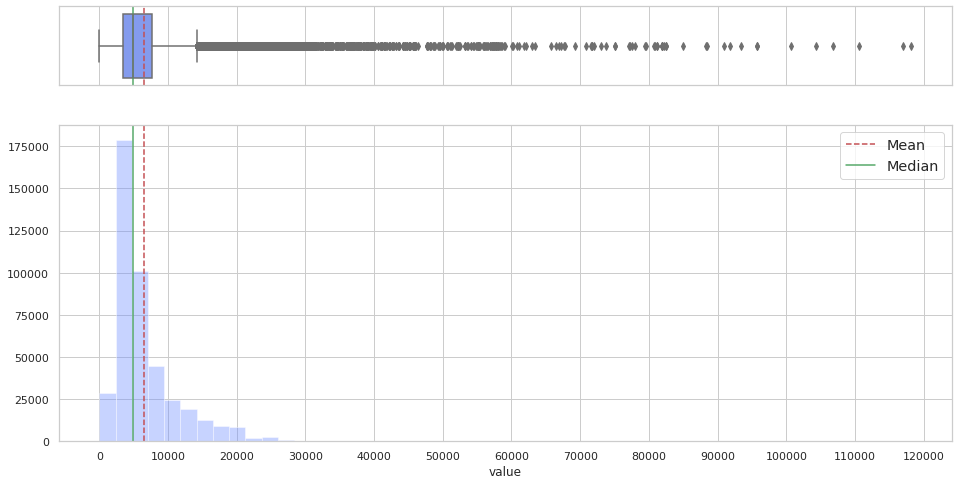

In [97]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.25, 1)}, figsize=(16,8))
mean = dataset.value.mean()
median = dataset.value.median()

_ = sns.boxplot(dataset.value, ax=ax_box,  color=color, showfliers=True)
_ = ax_box.axvline(mean, color='r', linestyle='--')
_ = ax_box.axvline(median, color='g', linestyle='-')
_ = ax_box.set(xlabel='')

_ = sns.distplot(dataset.value, ax=ax_hist, color=color, kde=False)
_ = ax_hist.axvline(mean, color='r', linestyle='--')
_ = ax_hist.axvline(median, color='g', linestyle='-')
_ = ax_hist.xaxis.set_major_locator(ticker.MultipleLocator(10000))

_ = plt.legend({'Mean':mean,'Median':median}, fontsize='large')

In [102]:
names = pd.read_csv("data/processed/nomes.csv")

In [103]:
dict_names = {}
for x, y in names[['first_name', 'classification']].values:
    dict_names[x.lower()] = y

In [131]:
def get_gender(first_name):
    try:
        return dict_names[first_name]
    except:
        return np.NaN
    
dataset["gender"] = dataset["name"].apply(
    lambda name: get_gender(name.split()[0]) 
)

In [142]:
dataset.isnull().mean()

name                    0.000000
cpf                     0.000000
registration_n          0.000000
agency                  0.000000
agency_acronym          0.000000
superior_agency_cod     0.000000
role                    0.000000
classes                 0.000000
pattern                 0.000000
ref                     0.000000
level                   0.000000
retirement_type         0.000000
legal_substantiation    0.000000
doc_title               0.000000
retirement_date         0.000000
admission_type          0.000000
admission_date          0.000000
value                   0.000000
gender                  0.027075
dtype: float64

In [146]:
dataset.head()

,name,cpf,registration_n,agency,agency_acronym,superior_agency_cod,role,classes,pattern,ref,level,retirement_type,legal_substantiation,doc_title,retirement_date,admission_type,admission_date,value,gender
0,antonio alves bezerra,***686441**,130000000029,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE VIGILANCIA,S,II,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 63194 PUBLICADO EM 30DEZ1994 ...,1994-12-30,NOMEACAO PARA CARGO ...,1962-06-15,2596.79,M
1,antonio carlos conceicao martins,***423941**,130000000033,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,ESTATISTICO,S,III,0,0,VOLUNTARIA,CF 40 III A,PORTARIA NO. 26 PUBLICADO EM 31JAN1995 ...,1995-01-31,ADMISSAO SEM CONCURSO PUBLICO ...,1962-06-15,10951.35,M
2,antonio domingos alves,***473831**,130000000034,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,APOSENTADORIA POR INVALIDEZ,CF67 101 I 102 I A L1711 184 II,PORTARIA NO. 4567 PUBLICADO EM 01JAN1990 ...,1988-06-01,NOMEACAO PARA CARGO ...,1938-07-01,11369.73,M
3,arlinda costa gutemberg,***063691**,130000000048,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUXILIAR DE ENFERMAGEM,S,III,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 341 PUBLICADO EM 01JUL1990 ...,1990-07-01,ADMISSAO SEM CONCURSO PUBLICO ...,1962-06-15,3960.76,F
4,bento moreira lima junior,***460301**,130000000061,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,APOSENTADORIA POR INVALIDEZ,CF 40 I INT,LEI NO. 21050 PUBLICADO EM 02JUL1990 ...,1990-07-02,ADMISSAO SEM CONCURSO PUBLICO ...,1961-06-08,20292.84,M


In [147]:
dataset.to_csv("data/processed/aposentados.csv", index=None)

In [159]:
dataset = dataset.drop_duplicates(subset=['name', 'cpf'], keep='first')
abono = abono.drop_duplicates(subset=['name', 'cpf'], keep='first')

In [169]:
use_cols = [
    'registration_n', 'agency_acronym', 'superior_agency_cod', 
    'classes', 'pattern', 'ref', 'level', 'retirement_type', 
    'legal_substantiation', 'doc_title', 'retirement_date',
    'admission_type', 'admission_date', 'value'
]
data = abono.merge(dataset[['name', 'cpf'] + use_cols], left_on=['name', 'cpf'], right_on=['name', 'cpf'])